#### Обработка данных

In [1]:
import pandas as pd
import numpy as np

import plotly.plotly as py
import plotly.graph_objs as go

from scipy import optimize as opt 
import scipy
import scipy.odr as odr

from statsmodels.stats.weightstats import *

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data1 = pd.read_csv('data/experiment1.csv') # Считываем данные

In [3]:
z_m_2 = 2 * np.sqrt(5461 * 10**(-10) * data1['a'] * 10**(-3) * data1['m'])

In [4]:
z_m_2 * 10**(6)

0    343.449560
1    362.027623
2    349.751912
3    330.484493
4    323.807350
dtype: float64

In [5]:
z_m_2_error = z_m_2 * (0.5 / data1['a'])

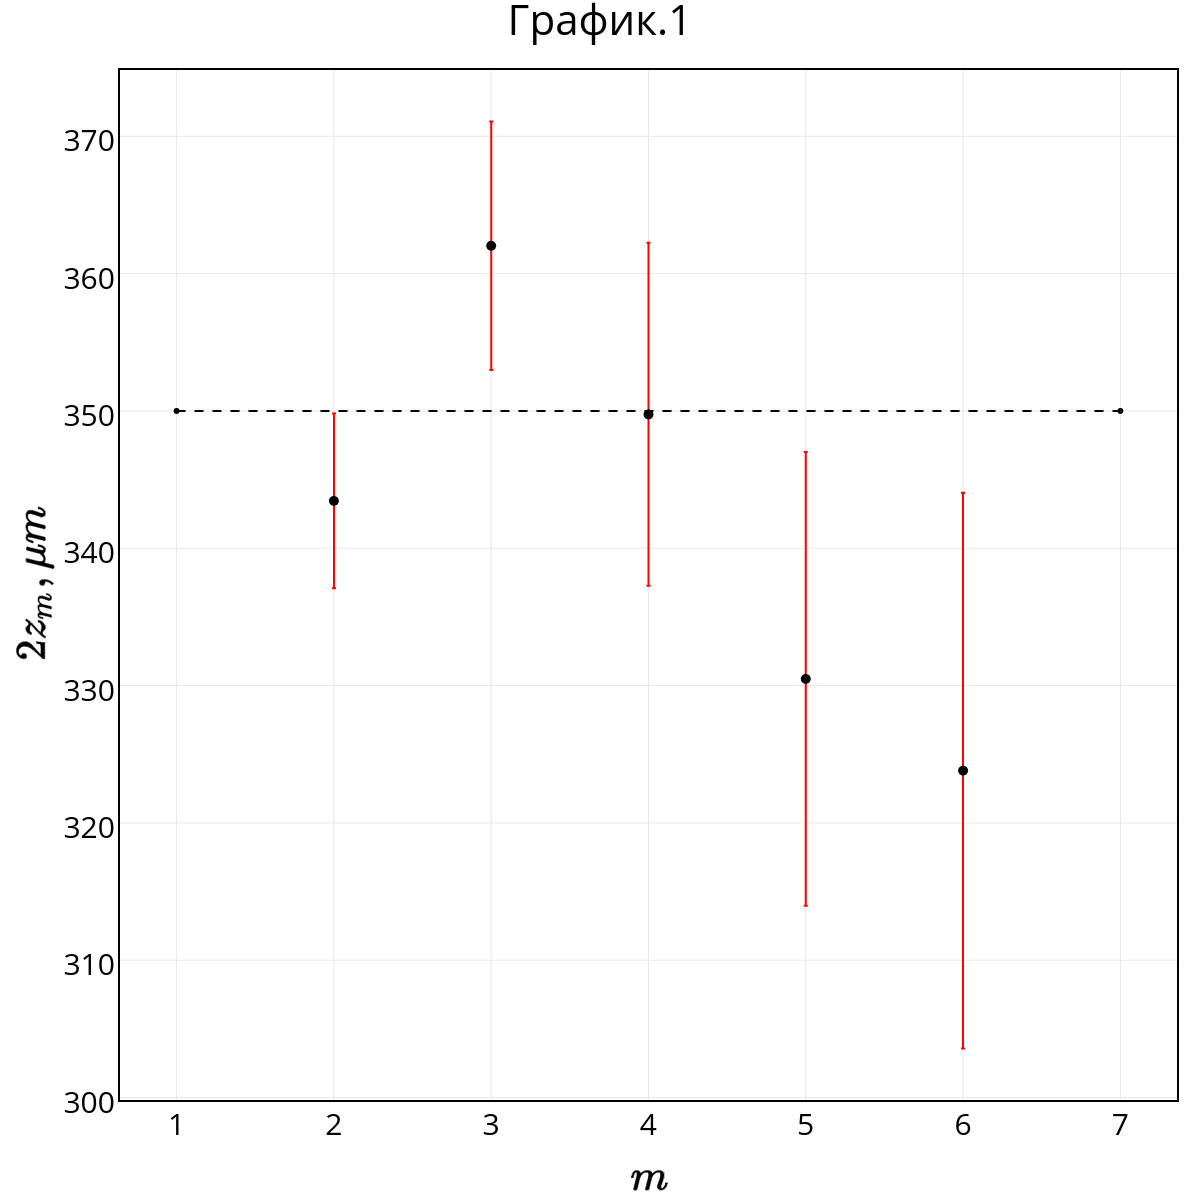

In [6]:
trace1 = go.Scatter(
    x = data1['m'],
    y = z_m_2 * 10**(6),
    mode = 'markers',
    name = '$D_l$',
    error_y = dict(
        type='array',
        array=z_m_2_error * 10**(6),
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    ),
)

trace2 = go.Scatter(
    x = [1, 7],
    y = [350, 350],
    line = dict(
        color = ('#000000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2]

layout = go.Layout(
    showlegend=False,
    legend=dict(
        #x=0.9,
        #y=1
        orientation= "h"
    ),
    title = "График.1",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$m$',
        #range = [0.0, 1.5],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$2 z_m, μm$',
        #range = [0, 11],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot1.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot1.png", width=500)

In [7]:
data2 = pd.read_csv('data/experiment2.csv') # Считываем данные

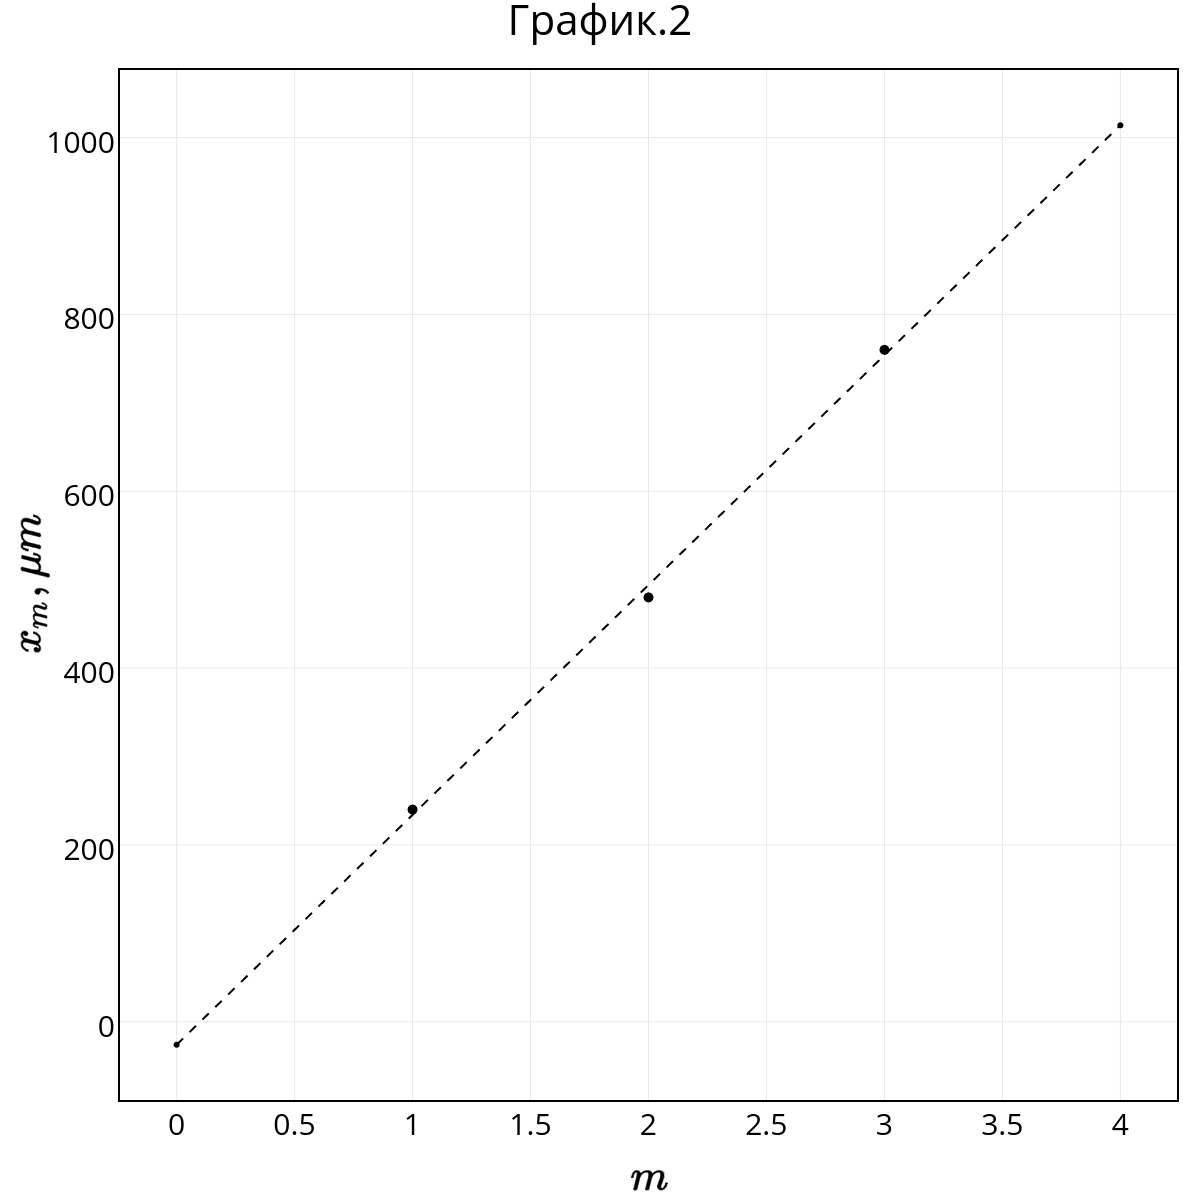

In [8]:
trace1 = go.Scatter(
    x = data2['m'],
    y = data2['xm'],
    mode = 'markers',
    name = '$D_l$',
#     error_y = dict(
#         type='array',
#         array=z_m_2_error * 10**(6),
#         visible = True,
#         color = '#ff0000',
#         thickness = 2,
#         width = 2
#     ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    ),
)

trace2 = go.Scatter(
    x = [0, 4],
    y = [- 26 + 260 * 0, -26 + 260 * 4],
    line = dict(
        color = ('#000000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2]

layout = go.Layout(
    showlegend=False,
    legend=dict(
        #x=0.9,
        #y=1
        orientation= "h"
    ),
    title = "График.2",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$m$',
        #range = [0.0, 1.5],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$x_m, μm$',
        #range = [0, 11],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot2.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot2.png", width=500)

In [9]:
Y = np.reshape(np.array(data2['xm']), (1, len(np.array(data2['xm']))))
X = np.reshape(np.array(data2['m']), (1, len(np.array(data2['m']))))
def f(x, b, c):
    return b*x+c
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print parameters_opt_1
print np.sqrt(np.diag(parameters_cov_1))

[ 260.00000138  -26.66666991]
[ 11.54700466  24.94438036]


In [10]:
0.102/(260 * 10**(-6)) * 5461 * 10**(-10)

0.0002142392307692308

In [11]:
0.0002142392307692308 * 10**(6)

214.2392307692308